## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_dataset = pd.read_csv('data/train.csv')
test_dataset = pd.read_csv('data/test.csv')

In [4]:
def Basic_Overview(train_data, test_data):
    print(30 * '=' + ' TRAIN / HEAD ' + 30 * '=')
    print(train_data.head(5))

    print(30 * '=' + ' TRAIN / INFO ' + 30 * '=')
    print(train_data.info())

    print(30 * '=' + ' TRAIN / DESCRIBE ' + 30 * '=')
    print(train_data.describe())

    print(30 * '=' + ' TEST / HEAD ' + 30 * '=')
    print(test_data.head(5))

    print(30 * '=' + ' TEST / INFO ' + 30 * '=')
    print(test_data.info())

    print(30 * '=' + ' TEST / DESCRIBE ' + 30 * '=')    
    print(test_data.describe())

In [5]:
Basic_Overview(train_dataset, test_dataset)

============================== TRAIN / HEAD ==============================
  StationId             Datetime    PM10     NO    NO2    NOx    NH3    CO  \
0     TG003  2019-02-11 20:00:00  139.25   0.25  24.65  13.32  15.40  0.50   
1     TG004  2020-05-28 23:00:00  122.75  12.23  33.38  25.18   0.72  0.37   
2     TG002  2020-05-12 20:00:00   57.50   3.35  29.90  18.05   9.17  0.01   
3     DL001  2020-01-27 13:00:00  345.50   8.62  69.08  43.75  48.27  2.75   
4     WB007  2020-05-28 06:00:00   36.02   5.83   3.70   9.85   2.96  0.26   

     SO2     O3  Benzene  Toluene  Xylene   PM2.5  
0   4.50  26.98     0.00     0.20    0.00   72.25  
1   5.67  34.03     9.38    80.00    5.82   33.00  
2   2.48  20.57     2.33     8.38    0.72   18.25  
3  18.85  13.17     1.95     7.50    3.25  213.50  
4   4.06  37.94     0.89     2.07    0.32   20.45  
============================== TRAIN / INFO ==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558713 entries, 0 

In [11]:
num_duplicates = train_dataset.duplicated().sum()
print("Duplicated row:", num_duplicates)

train_dataset = train_dataset.drop_duplicates(keep = 'first')

Duplicated row: 0


In [6]:
Test_id = test_dataset['id'].copy()

to_drop = ['StationId', 'Datetime']
train_data = train_dataset.drop(to_drop, axis = 1)
test_data = test_dataset.drop(to_drop, axis = 1)
test_data = test_data.drop('id', axis = 1)

print(train_data.head(5))
print(test_data.head(5))

     PM10     NO    NO2    NOx    NH3    CO    SO2     O3  Benzene  Toluene  \
0  139.25   0.25  24.65  13.32  15.40  0.50   4.50  26.98     0.00     0.20   
1  122.75  12.23  33.38  25.18   0.72  0.37   5.67  34.03     9.38    80.00   
2   57.50   3.35  29.90  18.05   9.17  0.01   2.48  20.57     2.33     8.38   
3  345.50   8.62  69.08  43.75  48.27  2.75  18.85  13.17     1.95     7.50   
4   36.02   5.83   3.70   9.85   2.96  0.26   4.06  37.94     0.89     2.07   

   Xylene   PM2.5  
0    0.00   72.25  
1    5.82   33.00  
2    0.72   18.25  
3    3.25  213.50  
4    0.32   20.45  
     PM10     NO    NO2    NOx    NH3     CO   SO2     O3  Benzene  Toluene  \
0  203.37   5.21   2.36   7.57    NaN   0.73   NaN  64.49     0.00     0.00   
1     NaN  13.70  52.48  41.54    NaN   1.21  6.88   2.41     2.95     3.32   
2  146.75   4.05  14.55  11.03  14.43  10.21  5.65  48.62     3.62     7.00   
3  185.75  10.51  20.62  31.13    NaN   2.58   NaN   6.41      NaN      NaN   
4     NaN 

In [6]:
numerical_cols = [col for col in train_data.select_dtypes(include = [np.number]).columns]
categorical_cols = [col for col in train_data.select_dtypes(include = ['object', 'category', 'bool']).columns]

print(f'Numerical Cols: {numerical_cols}') #12
print(f'Categorical Cols: {categorical_cols}')

Numerical Cols: ['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'PM2.5']
Categorical Cols: []


### EDA Function

In [7]:
def HistPlot(data, num_cols):
    plt.figure(figsize = (16, 12))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(data[col],
                     stat = 'count',
                     kde = True, 
                     bins = 30
                     )
        plt.title(f'Distribution of {col}', fontsize = 12)
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout
    plt.show()

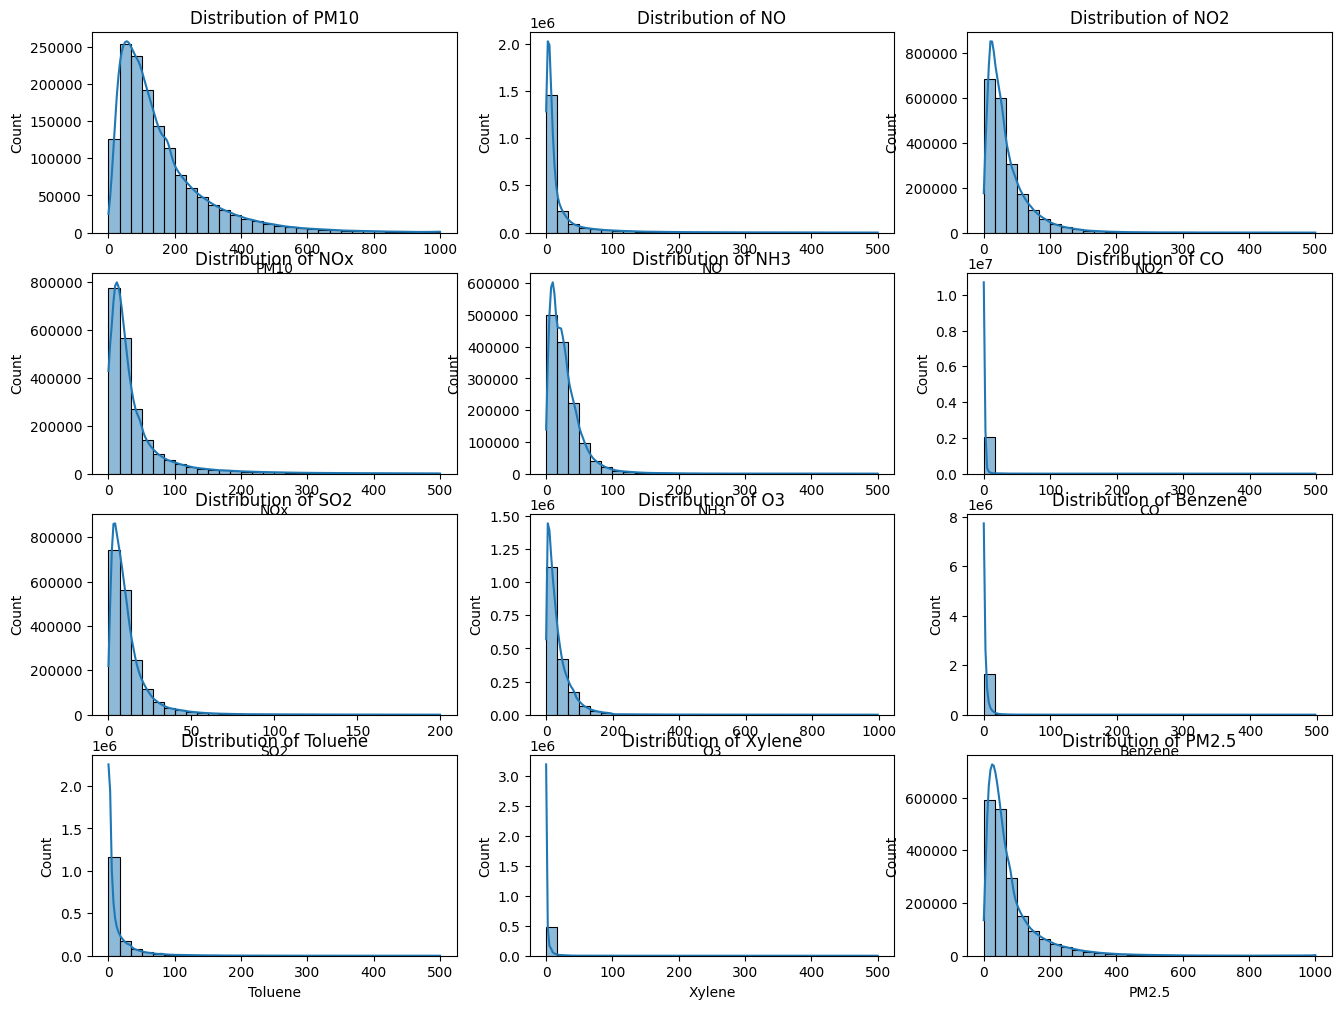

In [8]:
HistPlot(train_data, numerical_cols)

In [9]:
def Boxplot(data, num_cols):
    plt.figure(figsize = (16, 12))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(y = data[col])
        plt.title(col, fontsize = 12)
        plt.xlabel('')
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

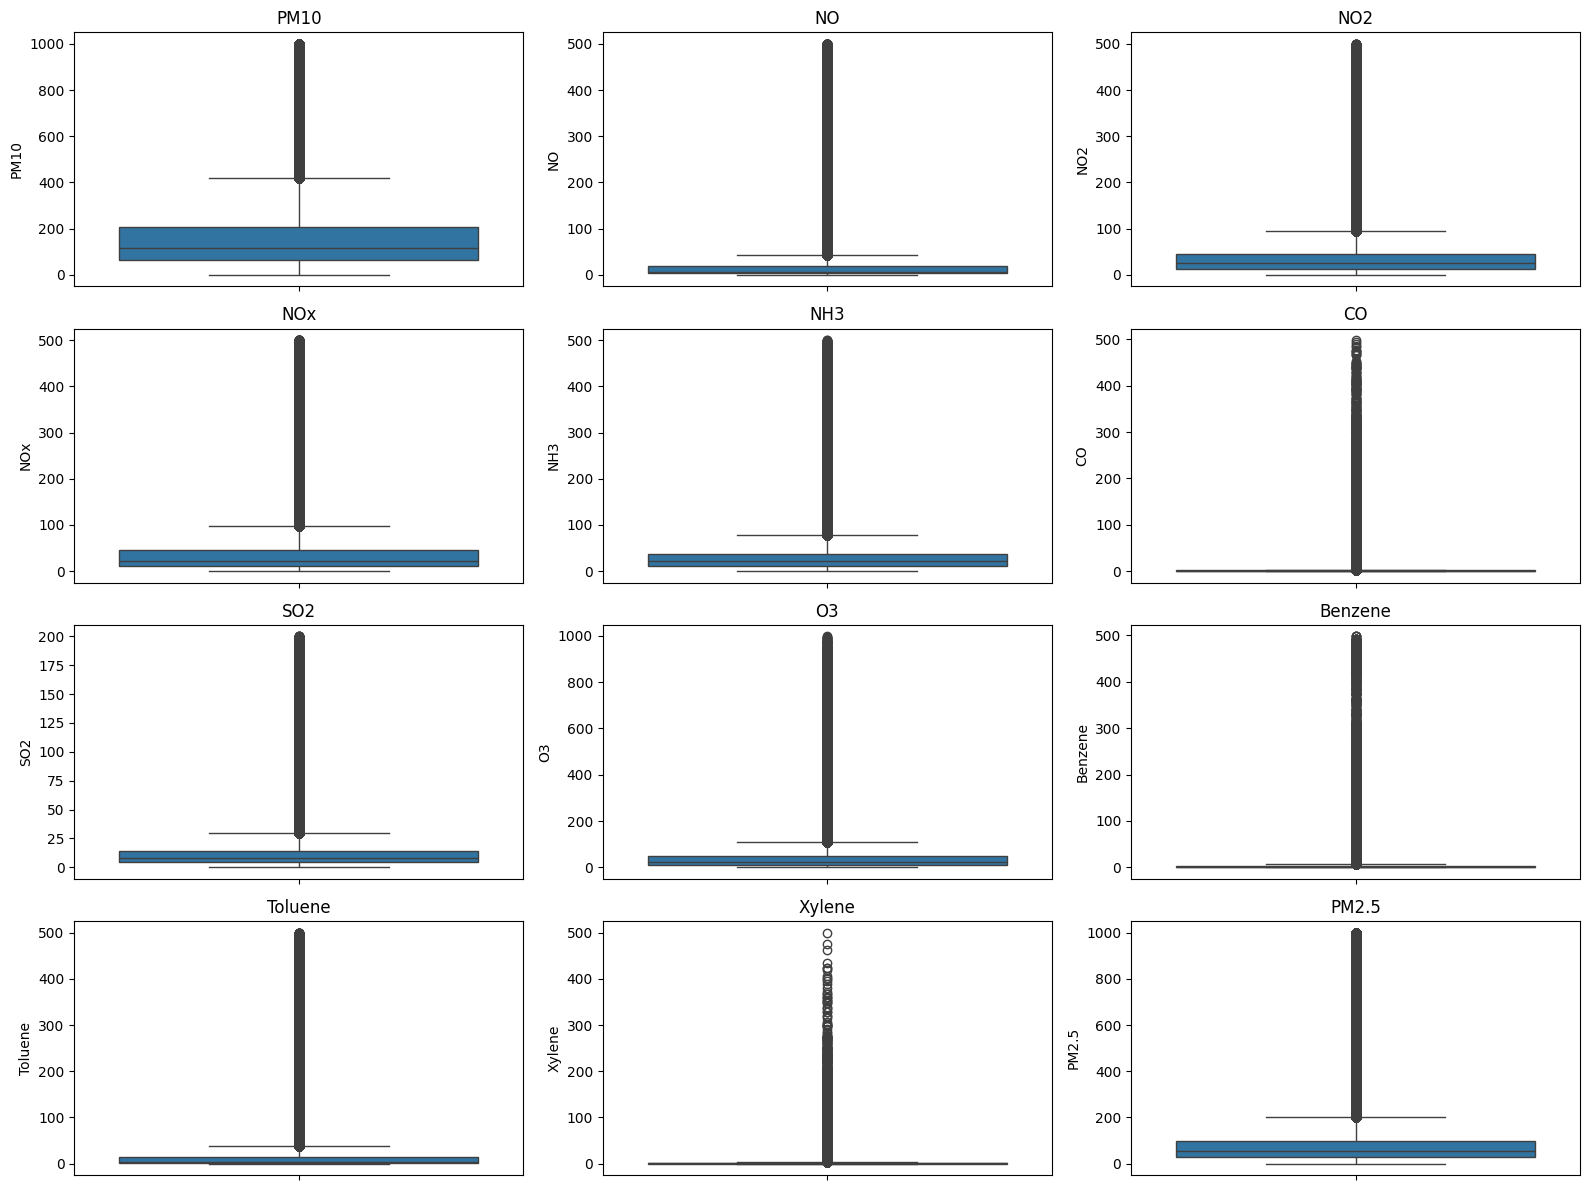

In [10]:
Boxplot(train_data, numerical_cols)

In [11]:
def Corr_Matrix(data, num_cols):
    corr_matrix = data[num_cols].corr()
    plt.figure(figsize = (15, 12))
    sns.heatmap(
        corr_matrix, 
        annot = True, 
        fmt = '.2f',
        linewidth = 0.5,
        cbar_kws = {'label': 'Correlation Coefficient'}   
    )
    plt.title('Correlation Matrix', fontsize = 14)
    plt.tight_layout()
    plt.show()

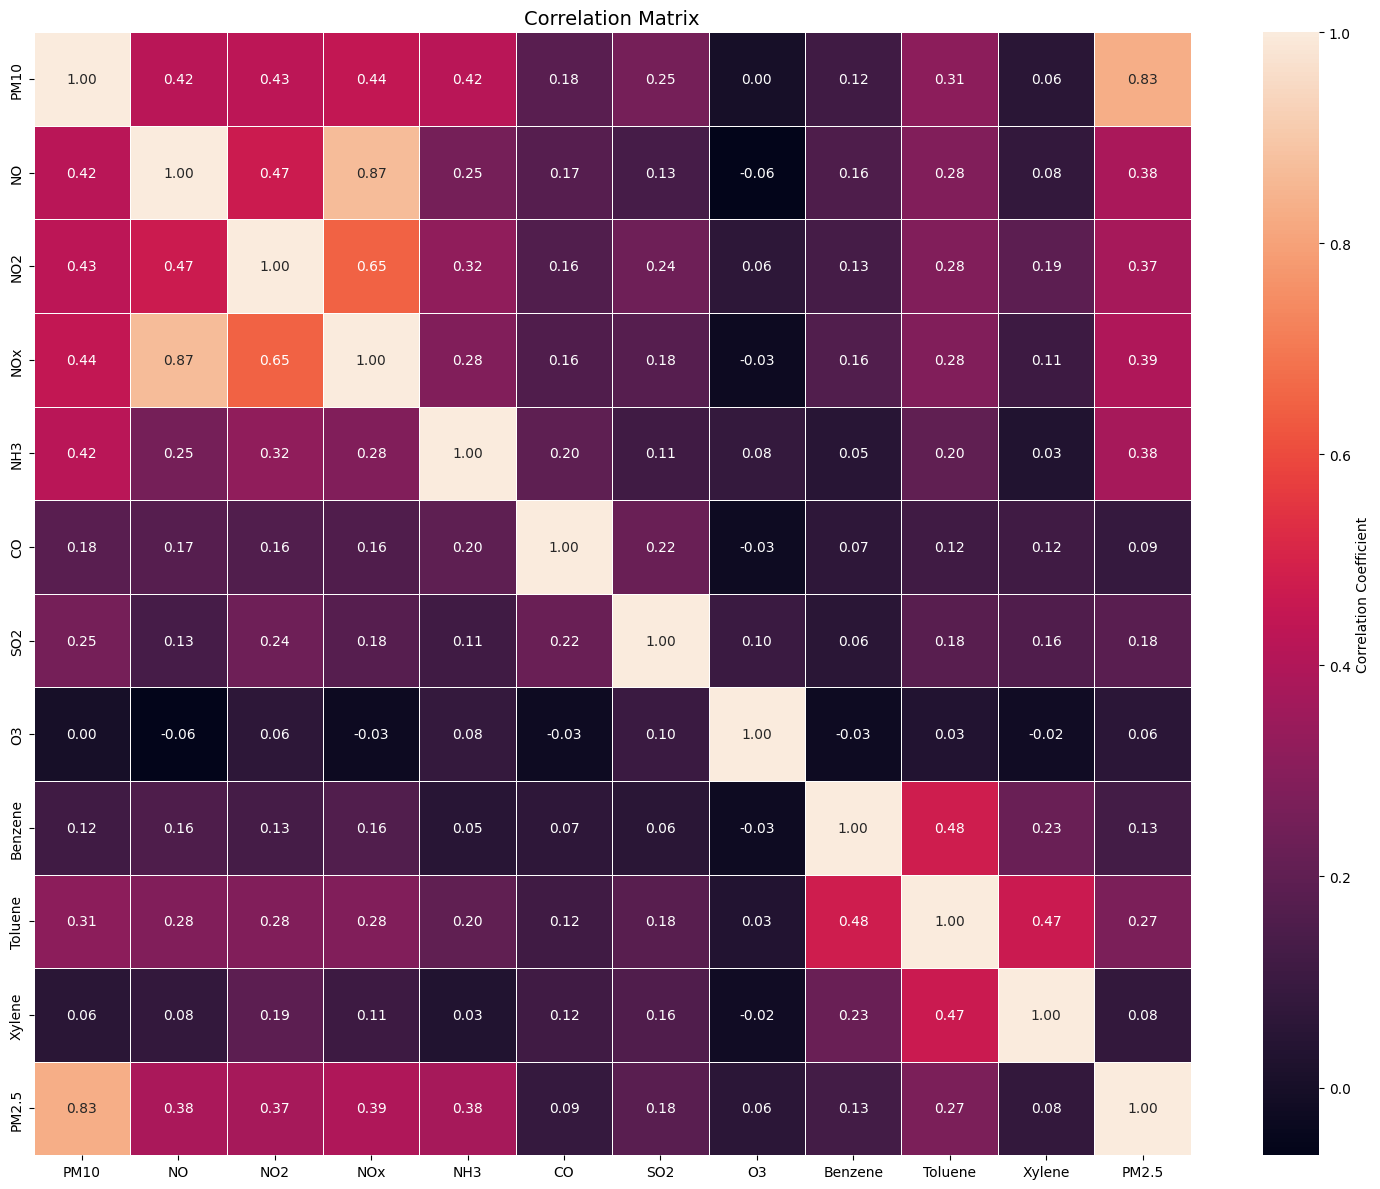

In [12]:
Corr_Matrix(train_dataset, numerical_cols)

In [ ]:
# Có thể skip

def Corr_Rank(data, columns):
    for col in columns:
        corr_label = data.corr(numeric_only = True)[col].sort_values(ascending = False)

        plt.figure(figsize = (3, 5))
        sns.heatmap(corr_label.to_frame(),
                    annot = True, 
                    fmt = '.2f',
                    cbar = 'False')
        plt.title(f'Correlation with {col}', fontsize = 12)
        plt.show()

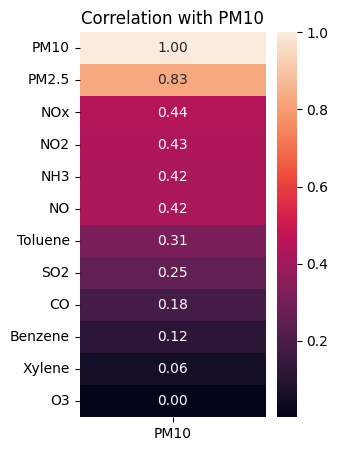

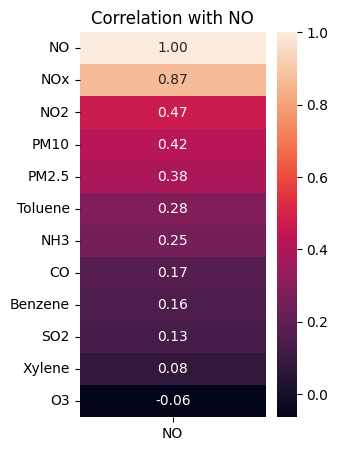

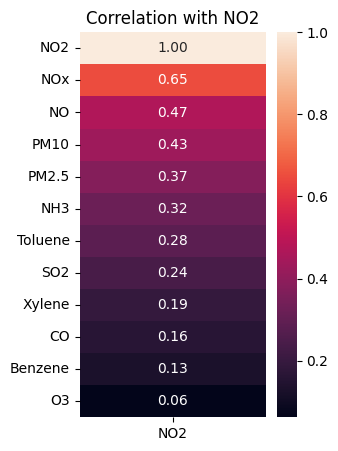

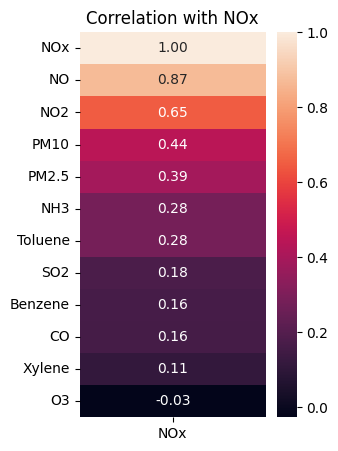

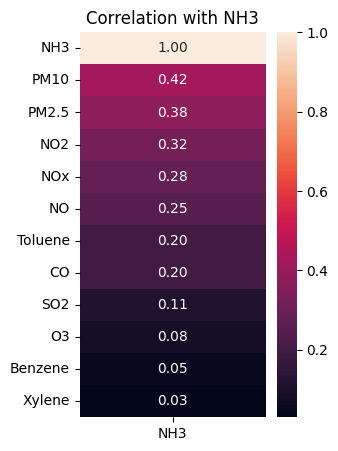

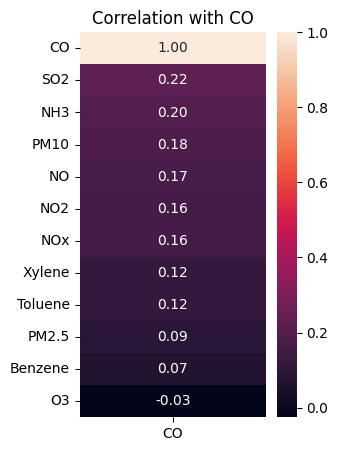

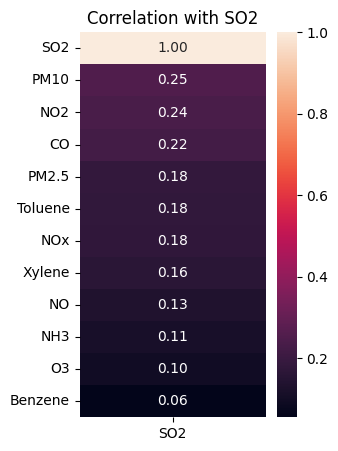

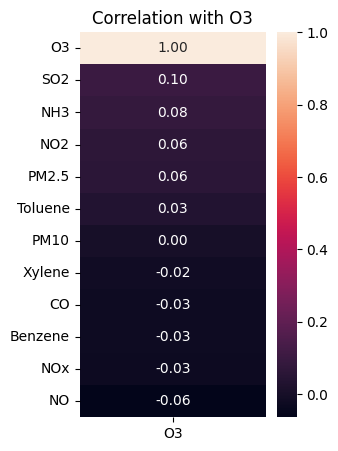

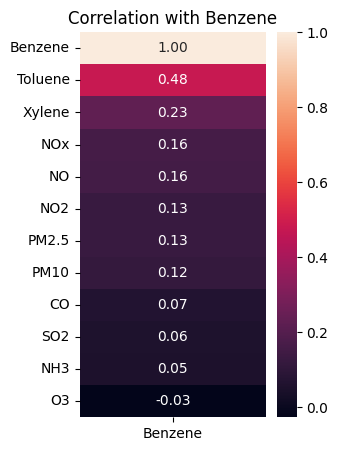

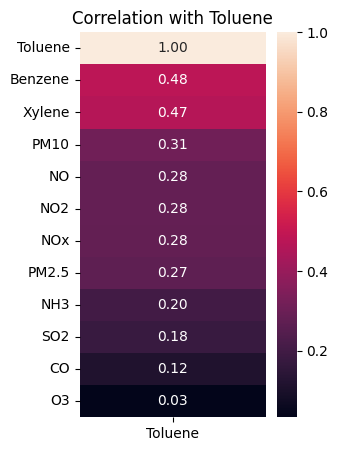

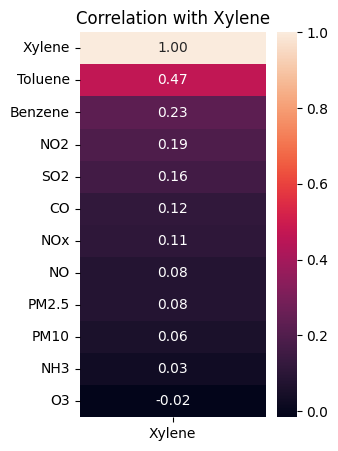

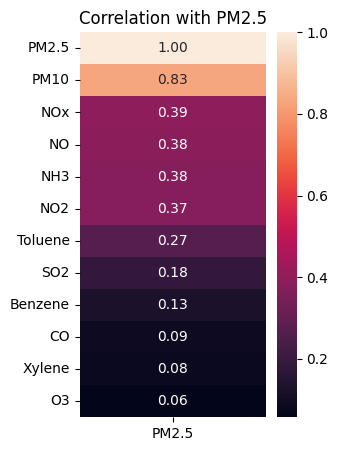

In [14]:
Corr_Rank(train_data, numerical_cols)

In [15]:
def PairPlot(data, cols):
    sns.pairplot(data,
                 vars = cols, 
                 corner = True, 
                 )
    plt.show()

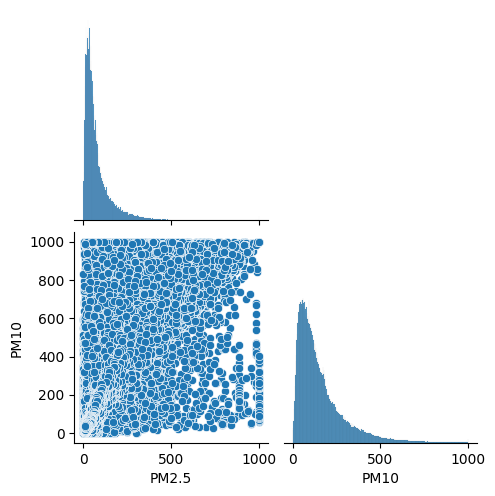

In [16]:
PairPlot(train_data, ['PM2.5', 'PM10'])

In [17]:
def Count_Duplicates(data):
    duplicate_counts = {}
    for col in data.columns:
        duplicates = data[col].duplicated()
        count = duplicates.sum()
        duplicate_counts[col] = count
    return duplicate_counts

In [18]:
dup_cnt = Count_Duplicates(train_data)

for col, cnt in dup_cnt.items():
    print(f"Feature {col} has {cnt} duplicated values.")

Feature PM10 has 2501826 duplicated values.
Feature NO has 2521784 duplicated values.
Feature NO2 has 2532042 duplicated values.
Feature NOx has 2518084 duplicated values.
Feature NH3 has 2538232 duplicated values.
Feature CO has 2551465 duplicated values.
Feature SO2 has 2543357 duplicated values.
Feature O3 has 2535496 duplicated values.
Feature Benzene has 2547561 duplicated values.
Feature Toluene has 2534577 duplicated values.
Feature Xylene has 2553003 duplicated values.
Feature PM2.5 has 2513702 duplicated values.


In [ ]:
def Missing_Value(data):
    missing = data.isna().sum().sort_values(ascending = False)

    for column, count in missing.items():
        print(f"{column}: {count} missing values")

In [20]:
Missing_Value(train_data)

Xylene: 2067312 missing values
NH3: 1233251 missing values
PM10: 1116427 missing values
Toluene: 1039501 missing values
Benzene: 859493 missing values
SO2: 741535 missing values
O3: 725110 missing values
PM2.5: 647689 missing values
NO: 553379 missing values
NO2: 528753 missing values
CO: 498749 missing values
NOx: 490351 missing values


### Further EDA

## CODE

In [21]:
n_sample_train = train_data.shape[0]
n_sample_test = test_data.shape[0]

print(n_sample_train)
print(n_sample_test)

2558713
10000


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

### TEST

In [23]:
numerical_cols = [col for col in train_data.select_dtypes(include = [np.number]).columns]
categorical_cols = [col for col in train_data.select_dtypes(include = ['object', 'category', 'bool']).columns]

print(f'Numerical Cols: {numerical_cols}') #12
print(f'Categorical Cols: {categorical_cols}')

Numerical Cols: ['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'PM2.5']
Categorical Cols: []


In [24]:
#Dropna label
train_data_dropna_label = train_data.dropna(subset = ['PM2.5'], axis = 0)

In [25]:
x = train_data_dropna_label.drop('PM2.5', axis = 1)
y = train_data_dropna_label['PM2.5']

x_train, x_val, y_train, y_val = train_test_split(
    x, y,
    test_size = 0.2,
    random_state = 42, 
    #stratify = y # Không nên stratify cho regression
)

In [26]:
numerical_cols = [col for col in x.select_dtypes(include = [np.number]).columns]
categorical_cols = [col for col in x.select_dtypes(include = ['object', 'category', 'bool']).columns]

print(f'Numerical Cols: {numerical_cols}') #12
print(f'Categorical Cols: {categorical_cols}')

Numerical Cols: ['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
Categorical Cols: []


In [27]:
num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])
nom_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(sparse_output = False))
])
preprocessor = ColumnTransformer(transformers = [
    ("num_features", num_transformer, numerical_cols),
    ("nom_features", nom_transformer, categorical_cols)
])

In [28]:
x_train = preprocessor.fit_transform(x_train)
x_val = preprocessor.transform(x_val)

In [29]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)
model.predict(x_val)

array([60.12156646, 65.52489614, 23.17275837, ..., 80.76462727,
       93.21350861, 62.42692802])

In [44]:
x_test = preprocessor.transform(test_data)

In [45]:
preds = model.predict(x_test)

In [46]:
preds

array([ 91.81863824,  66.38271989,  69.28570857, ..., 220.15418476,
        95.17799229, 110.85957484])

In [47]:
submission = pd.DataFrame({'id': test_dataset['id'].values, 'res': preds})
submission.to_csv("submission.csv", index=False)

print("\n✅ submission.csv generated successfully!")
submission.head()


✅ submission.csv generated successfully!


,id,res
0,1,91.818638
1,2,66.382720
2,3,69.285709
3,4,84.965330
4,5,57.119833


### Preprocessing

In [ ]:
# NUMERICAL
num_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler()) 
])

# ORDINAL
education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]
#gender_order = ["male", "female"]
gender_order = df["gender"].unique()
lunch_order = df["lunch"].unique()
test_order = df["test preparation course"].unique()

ord_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OrdinalEncoder(categories = [education_order, gender_order, lunch_order, test_order]))
])

# NOMINAL
nom_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder(sparse_output = False))
])

In [ ]:
preprocessor = ColumnTransformer(transformers = [
    ("num_features", num_transformer, ["reading score", "writing score"]),
    ("ord_features", ord_transformer, ["parental level of education", "gender", "lunch", "test preparation course"]),
    ("nom_features", nom_transformer, ["race/ethnicity"])
])

### Train & Evaluate